In [1]:
import scipy

In [2]:
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

2023-10-05 23:33:41.530712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 23:33:42.928324: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-05 23:33:42.928392: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-05 23:33:42.933927: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-05 23:33:43.989397: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-05 23:33:43.998015: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
# Getting image data directory
image_data_dir = "/home/hduser/Downloads/animals"

num_classes = 4

# Defining data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

# Loading and preprocessing images
batch_size = 32
image_size = (32, 32)

train_generator = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    image_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
# Loading pre-trained VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_size + (3,))

# Freezing the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Creating a custom classifier
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

# Compiling and training the model
# ...

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Evaluating the model
accuracy = model.evaluate(validation_generator)[1]
print(f"Accuracy: {accuracy}")


Found 1204 images belonging to 4 classes.
Found 300 images belonging to 4 classes.
Epoch 1/10
38/38 [==============================] - 45s 1s/step - loss: 1.2295 - accuracy: 0.4228 - val_loss: 1.0623 - val_accuracy: 0.5500
Epoch 2/10
38/38 [==============================] - 43s 1s/step - loss: 1.0053 - accuracy: 0.5789 - val_loss: 0.9980 - val_accuracy: 0.5767
Epoch 3/10
38/38 [==============================] - 44s 1s/step - loss: 0.9277 - accuracy: 0.6154 - val_loss: 0.9741 - val_accuracy: 0.6067
Epoch 4/10
38/38 [==============================] - 51s 1s/step - loss: 0.8688 - accuracy: 0.6420 - val_loss: 0.9558 - val_accuracy: 0.6200
Epoch 5/10
38/38 [==============================] - 55s 1s/step - loss: 0.8182 - accuracy: 0.6761 - val_loss: 0.9736 - val_accuracy: 0.5967
Epoch 6/10
38/38 [==============================] - 45s 1s/step - loss: 0.7803 - accuracy: 0.6935 - val_loss: 0.9730 - val_accuracy: 0.5967
Epoch 7/10
38/38 [==============================] - 67s 2s/step - loss: 0.735

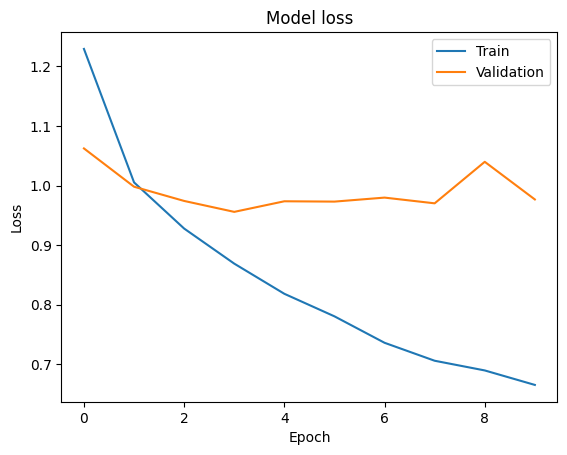

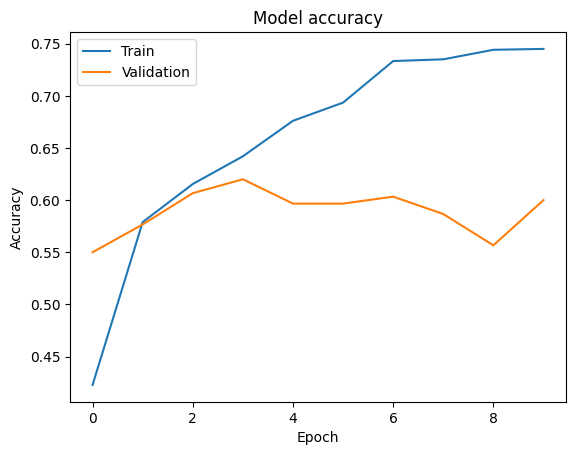

In [5]:
import matplotlib.pyplot as plt

# Plot training,  validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training, validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


10/10 [==============================] - 19s 2s/step


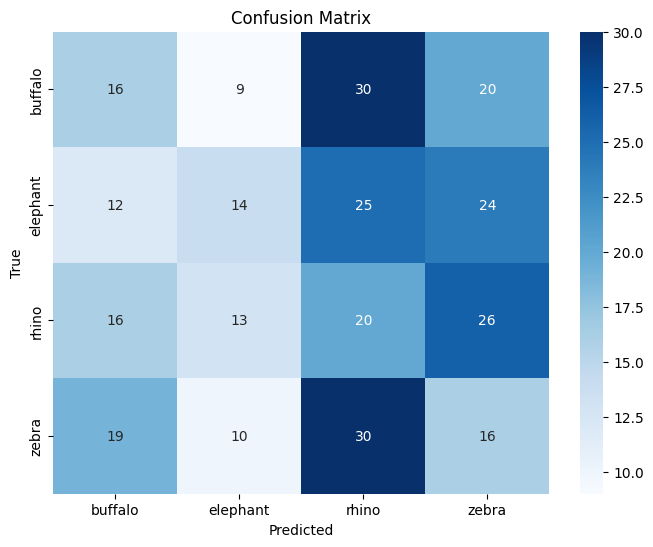

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ['buffalo', 'elephant', 'rhino', 'zebra']
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
from keras.preprocessing import image
image_data_dir = "/home/hduser/Downloads/animals/elephant/003.jpg"  


img = image.load_img(image_data_dir, target_size=image_size)  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0

# predictions
class_probabilities = model.predict(img_array)

# Class labels and probabilities
class_labels = train_generator.class_indices  # This is a dictionary mapping class names to class indices

# Printsof class labels and corresponding probabilities
for label, index in class_labels.items():
    probability = class_probabilities[0][index]
    print(f"Class: {label}, Probability: {probability:.2f}")


1/1 [==============================] - 0s 69ms/step
Class: buffalo, Probability: 0.48
Class: elephant, Probability: 0.06
Class: rhino, Probability: 0.46
Class: zebra, Probability: 0.00


1/1 [==============================] - 0s 121ms/step
Predicted Class: elephant
Confidence: 0.77


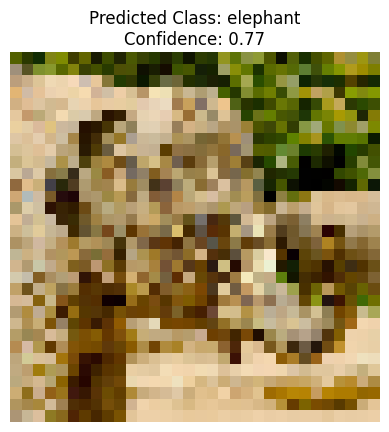

In [30]:
image_data_dir = "/home/hduser/Downloads/animals/elephant/014.jpg" 

# image for verification
img = image.load_img(image_data_dir, target_size=image_size)  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # batch dimension

# Preprocess of image
img_array /= 255.0

# predictions
class_probabilities = model.predict(img_array)

# class labels and probabilities
class_labels = train_generator.class_indices  # This is a dictionary mapping class names to class indices

# class with the highest probability
predicted_class_index = np.argmax(class_probabilities)
predicted_class_label = [label for label, index in class_labels.items() if index == predicted_class_index][0]
confidence = class_probabilities[0][predicted_class_index]

# Prints and plots of the results
print(f"Predicted Class: {predicted_class_label}")
print(f"Confidence: {confidence:.2f}")
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_label}\nConfidence: {confidence:.2f}")
plt.show()
